In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [77]:
# Load the data from CSV
crime_data = pd.read_csv('SouthAfricaCrimeStats_v2.csv')

# Display the first few rows and check column names
print(crime_data.head())
print(crime_data.columns)

       Province            Station                           Category  \
0  Western Cape  Cape Town Central  All theft not mentioned elsewhere   
1       Gauteng        Jhb Central  All theft not mentioned elsewhere   
2  Western Cape    Mitchells Plain  All theft not mentioned elsewhere   
3    Free State          Park Road  All theft not mentioned elsewhere   
4       Gauteng   Pretoria Central  All theft not mentioned elsewhere   

   2005-2006  2006-2007  2007-2008  2008-2009  2009-2010  2010-2011  \
0       6692       6341       5966       5187       4985       5127   
1       6093       4602       3761       3610       3267       3037   
2       5341       6093       6316       6803       6035       5761   
3       5108       4282       3834       3316       3101       3013   
4       5099       4536       3309       2694       2616       2606   

   2011-2012  2012-2013  2013-2014  2014-2015  2015-2016  
0       5285       5937       5600       5335       5176  
1       2886    

In [78]:
# Check for missing values
print(crime_data.isnull().sum())

# Convert any necessary columns to numeric
crime_data.iloc[:, 3:] = crime_data.iloc[:, 3:].apply(pd.to_numeric, errors='coerce').fillna(0)

Province     0
Station      0
Category     0
2005-2006    0
2006-2007    0
2007-2008    0
2008-2009    0
2009-2010    0
2010-2011    0
2011-2012    0
2012-2013    0
2013-2014    0
2014-2015    0
2015-2016    0
dtype: int64


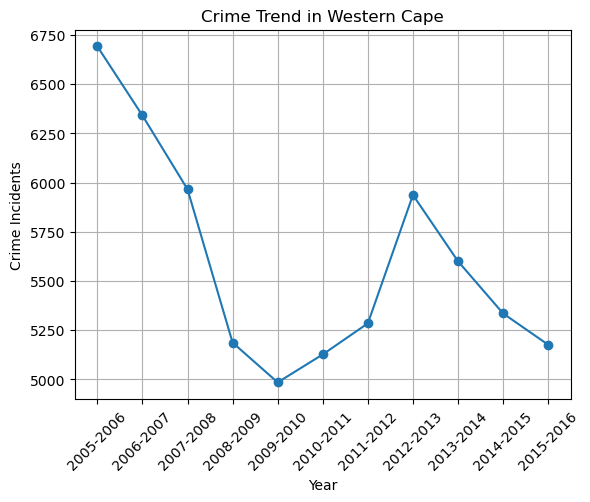

In [79]:
# Example: Plot crime trends over the years for a specific province or station
province_data = crime_data[crime_data['Province'] == 'Western Cape']
plt.plot(province_data.columns[3:], province_data.iloc[0, 3:], marker='o')
plt.xlabel('Year')
plt.ylabel('Crime Incidents')
plt.title('Crime Trend in Western Cape')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

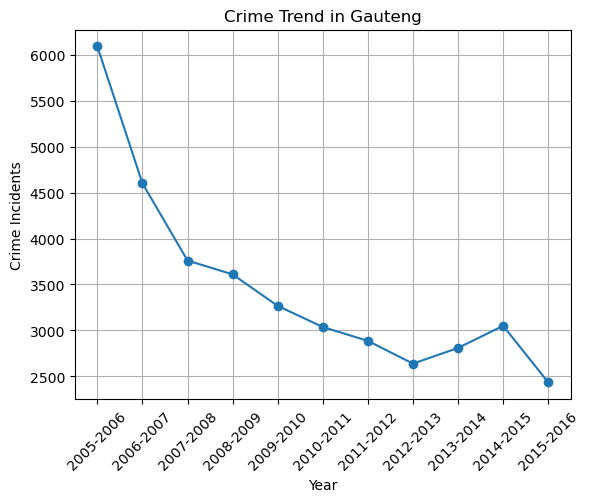

In [80]:
province_data = crime_data[crime_data['Province'] == 'Gauteng']
plt.plot(province_data.columns[3:], province_data.iloc[0, 3:], marker='o')
plt.xlabel('Year')
plt.ylabel('Crime Incidents')
plt.title('Crime Trend in Gauteng')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

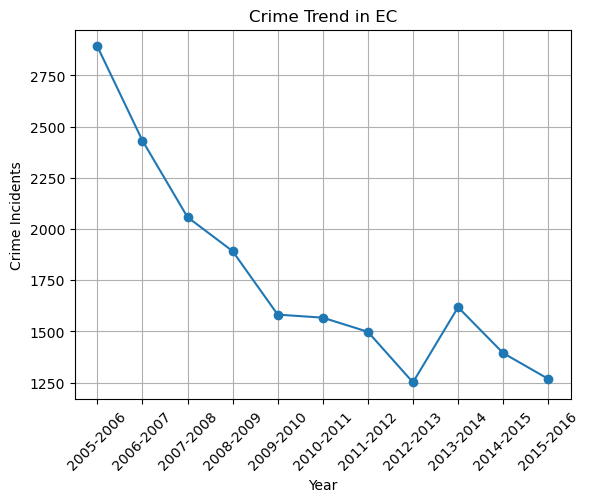

In [81]:
province_data = crime_data[crime_data['Province'] == 'Eastern Cape']
plt.plot(province_data.columns[3:], province_data.iloc[0, 3:], marker='o')
plt.xlabel('Year')
plt.ylabel('Crime Incidents')
plt.title('Crime Trend in EC')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [82]:
# Example: Calculate total crime incidents per category across all stations
crime_data['Total'] = crime_data.iloc[:, 3:].sum(axis=1)

In [83]:
# Example: Predict crime incidents for a specific category using linear regression
X = crime_data.iloc[:, 3:-1].values.reshape(-1, 1)  # Year as feature
y = crime_data['Total'].values

In [84]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ValueError: Found input variables with inconsistent numbers of samples: [339471, 30861]

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


In [ ]:
# Assuming X and y are aligned correctly
print("Shape of X before reshaping:", X.shape)
print("Shape of y before reshaping:", y.shape)

# Reshape X if needed (e.g., if X is a single column)
X = X.reshape(-1, 1)

# Ensure X and y have consistent shapes
assert X.shape[0] == y.shape[0], "Number of samples in X and y must be equal"

# Now proceed with train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Print shapes after split to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

In [ ]:
print("Shape of X before reshaping:", X.shape)
print("Shape of y before reshaping:", y.shape)

In [ ]:
X = X.reshape(-1, 1)  # Example reshaping if `X` is a single column


In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


In [ ]:
# Example approach to synchronize X and y
# Assuming X and y are from the same dataset but need alignment

# Ensure X and y are correctly loaded or created
print("Shape of X before reshaping:", X.shape)
print("Shape of y before reshaping:", y.shape)

# Check for data alignment issues or subset selection

# Example adjustment if X and y represent different subsets
# Assume y is a subset of X, select corresponding rows
X_subset = X[:y.shape[0]]  # Select first y.shape[0] rows from X

# Verify shapes after adjustment
print("Shape of X after adjustment:", X_subset.shape)
print("Shape of y after adjustment:", y.shape)

# Now proceed with train-test split
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=0)

# Print shapes after split to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


In [ ]:
# Example: Calculate total crime incidents per category across all stations
crime_data['Total'] = crime_data.iloc[:, 3:].sum(axis=1)


In [ ]:
# Example: Predict crime incidents for a specific category using linear regression
X = crime_data.iloc[:, 3:-1].values.reshape(-1, 1)  # Year as feature
y = crime_data['Total'].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=0)

In [ ]:

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

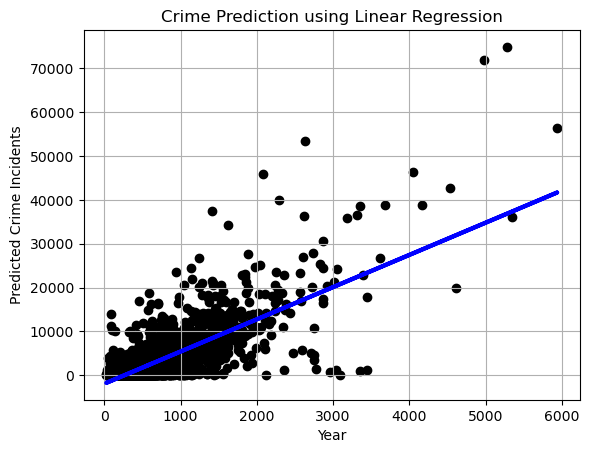

In [85]:
# Plot predictions
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Year')
plt.ylabel('Predicted Crime Incidents')
plt.title('Crime Prediction using Linear Regression')
plt.grid(True)
plt.show()


In [86]:
crimeData = pd.read_csv('SouthAfricaCrimeStats_v2.csv')

In [87]:
# Display the first few rows and inspect the columns
print(crime_data.head())

       Province            Station                           Category  \
0  Western Cape  Cape Town Central  All theft not mentioned elsewhere   
1       Gauteng        Jhb Central  All theft not mentioned elsewhere   
2  Western Cape    Mitchells Plain  All theft not mentioned elsewhere   
3    Free State          Park Road  All theft not mentioned elsewhere   
4       Gauteng   Pretoria Central  All theft not mentioned elsewhere   

   2005-2006  2006-2007  2007-2008  2008-2009  2009-2010  2010-2011  \
0       6692       6341       5966       5187       4985       5127   
1       6093       4602       3761       3610       3267       3037   
2       5341       6093       6316       6803       6035       5761   
3       5108       4282       3834       3316       3101       3013   
4       5099       4536       3309       2694       2616       2606   

   2011-2012  2012-2013  2013-2014  2014-2015  2015-2016  Total  
0       5285       5937       5600       5335       5176  61631  
1 

In [88]:
# Example: Handle missing values (if any)
print(crime_data.isnull().sum())

Province     0
Station      0
Category     0
2005-2006    0
2006-2007    0
2007-2008    0
2008-2009    0
2009-2010    0
2010-2011    0
2011-2012    0
2012-2013    0
2013-2014    0
2014-2015    0
2015-2016    0
Total        0
dtype: int64


In [89]:
# Example: Convert categorical variables to numerical using one-hot encoding
crime_data = pd.get_dummies(crime_data, columns=['Province', 'Station', 'Category'], drop_first=True)

In [90]:
# Example: Normalize numerical features if needed
from sklearn.preprocessing import StandardScaler

In [91]:
crimeData.columns

Index(['Province', 'Station', 'Category', '2005-2006', '2006-2007',
       '2007-2008', '2008-2009', '2009-2010', '2010-2011', '2011-2012',
       '2012-2013', '2013-2014', '2014-2015', '2015-2016'],
      dtype='object')

In [92]:
scaler = StandardScaler()
numerical_cols = ['2005-2006', '2006-2007', '2007-2008', '2008-2009', '2009-2010', '2010-2011', '2011-2012',
       '2012-2013', '2013-2014', '2014-2015', '2015-2016']  # Replace with actual column names
crime_data[numerical_cols] = scaler.fit_transform(crime_data[numerical_cols])

In [93]:
# Verify cleaned and engineered data
print(crime_data.head())

   2005-2006  2006-2007  2007-2008  2008-2009  2009-2010  2010-2011  \
0  32.223100  31.669738  31.585592  27.345308  26.496895  27.818936   
1  29.308093  22.888436  19.778836  18.919849  17.236020  16.326765   
2  25.648519  30.417430  33.459680  35.979132  32.156917  31.305078   
3  24.514634  21.272556  20.169717  17.349092  16.341198  16.194797   
4  24.470836  22.555161  17.358585  14.025924  13.726806  13.956848   

   2011-2012  2012-2013  2013-2014  2014-2015  ...  \
0  28.455232  31.747836  29.465006  28.448893  ...   
1  15.369647  13.897015  14.590158  16.098613  ...   
2  32.944368  29.458992  26.134021  21.465715  ...   
3  14.240545  16.483463  15.219048  12.028696  ...   
4  14.000542  17.078671  16.919183  15.244633  ...   

   Category_Robbery at residential premises  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4            

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Visualize crime trends over the years by province
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [95]:
# Check if 'Province' column exists in the DataFrame
if 'Province' in crime_data.columns:
    # Subset selection for Gauteng province
    gauteng_data = crimeData[crimeData['Province'] == 'Gauteng']
    print(gauteng_data.head())
else:
    print("The 'Province' column does not exist in the DataFrame.")

The 'Province' column does not exist in the DataFrame.


In [70]:
crime_data.head()

,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,...,Category_Robbery at residential premises,Category_Robbery of cash in transit,Category_Robbery with aggravating circumstances,Category_Sexual Offences,Category_Sexual offences as result of police action,Category_Shoplifting,Category_Stock-theft,Category_Theft of motor vehicle and motorcycle,Category_Theft out of or from motor vehicle,Category_Truck hijacking
0,32.223100,31.669738,31.585592,27.345308,26.496895,27.818936,28.455232,31.747836,29.465006,28.448893,...,False,False,False,False,False,False,False,False,False,False
1,29.308093,22.888436,19.778836,18.919849,17.236020,16.326765,15.369647,13.897015,14.590158,16.098613,...,False,False,False,False,False,False,False,False,False,False
2,25.648519,30.417430,33.459680,35.979132,32.156917,31.305078,32.944368,29.458992,26.134021,21.465715,...,False,False,False,False,False,False,False,False,False,False
3,24.514634,21.272556,20.169717,17.349092,16.341198,16.194797,14.240545,16.483463,15.219048,12.028696,...,False,False,False,False,False,False,False,False,False,False
4,24.470836,22.555161,17.358585,14.025924,13.726806,13.956848,14.000542,17.078671,16.919183,15.244633,...,False,False,False,False,False,False,False,False,False,False


In [96]:
crimeData.head()

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635
3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030


In [97]:
# Check if 'Province' column exists in the DataFrame
if 'Province' in crimeData.columns:
    # Subset selection for Gauteng province
    gauteng_data = crimeData[crimeData['Province'] == 'Gauteng']
    print(gauteng_data.head())
else:
    print("The 'Province' column does not exist in the DataFrame.")

  Province           Station                           Category  2005-2006  \
1  Gauteng       Jhb Central  All theft not mentioned elsewhere       6093   
4  Gauteng  Pretoria Central  All theft not mentioned elsewhere       5099   
7  Gauteng          Brooklyn  All theft not mentioned elsewhere       3931   
8  Gauteng          Booysens  All theft not mentioned elsewhere       3681   
9  Gauteng          Hillbrow  All theft not mentioned elsewhere       3489   

   2006-2007  2007-2008  2008-2009  2009-2010  2010-2011  2011-2012  \
1       4602       3761       3610       3267       3037       2886   
4       4536       3309       2694       2616       2606       2635   
7       3583       2878       2568       2415       2162       2050   
8       3277       2849       2603       2580       3107       2568   
9       2914       3093       2706       2250       2298       2051   

   2012-2013  2013-2014  2014-2015  2015-2016  
1       2638       2809       3050       2434  
4       

C:\Users\tpmut\AppData\Local\Temp\ipykernel_10264\2335982486.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


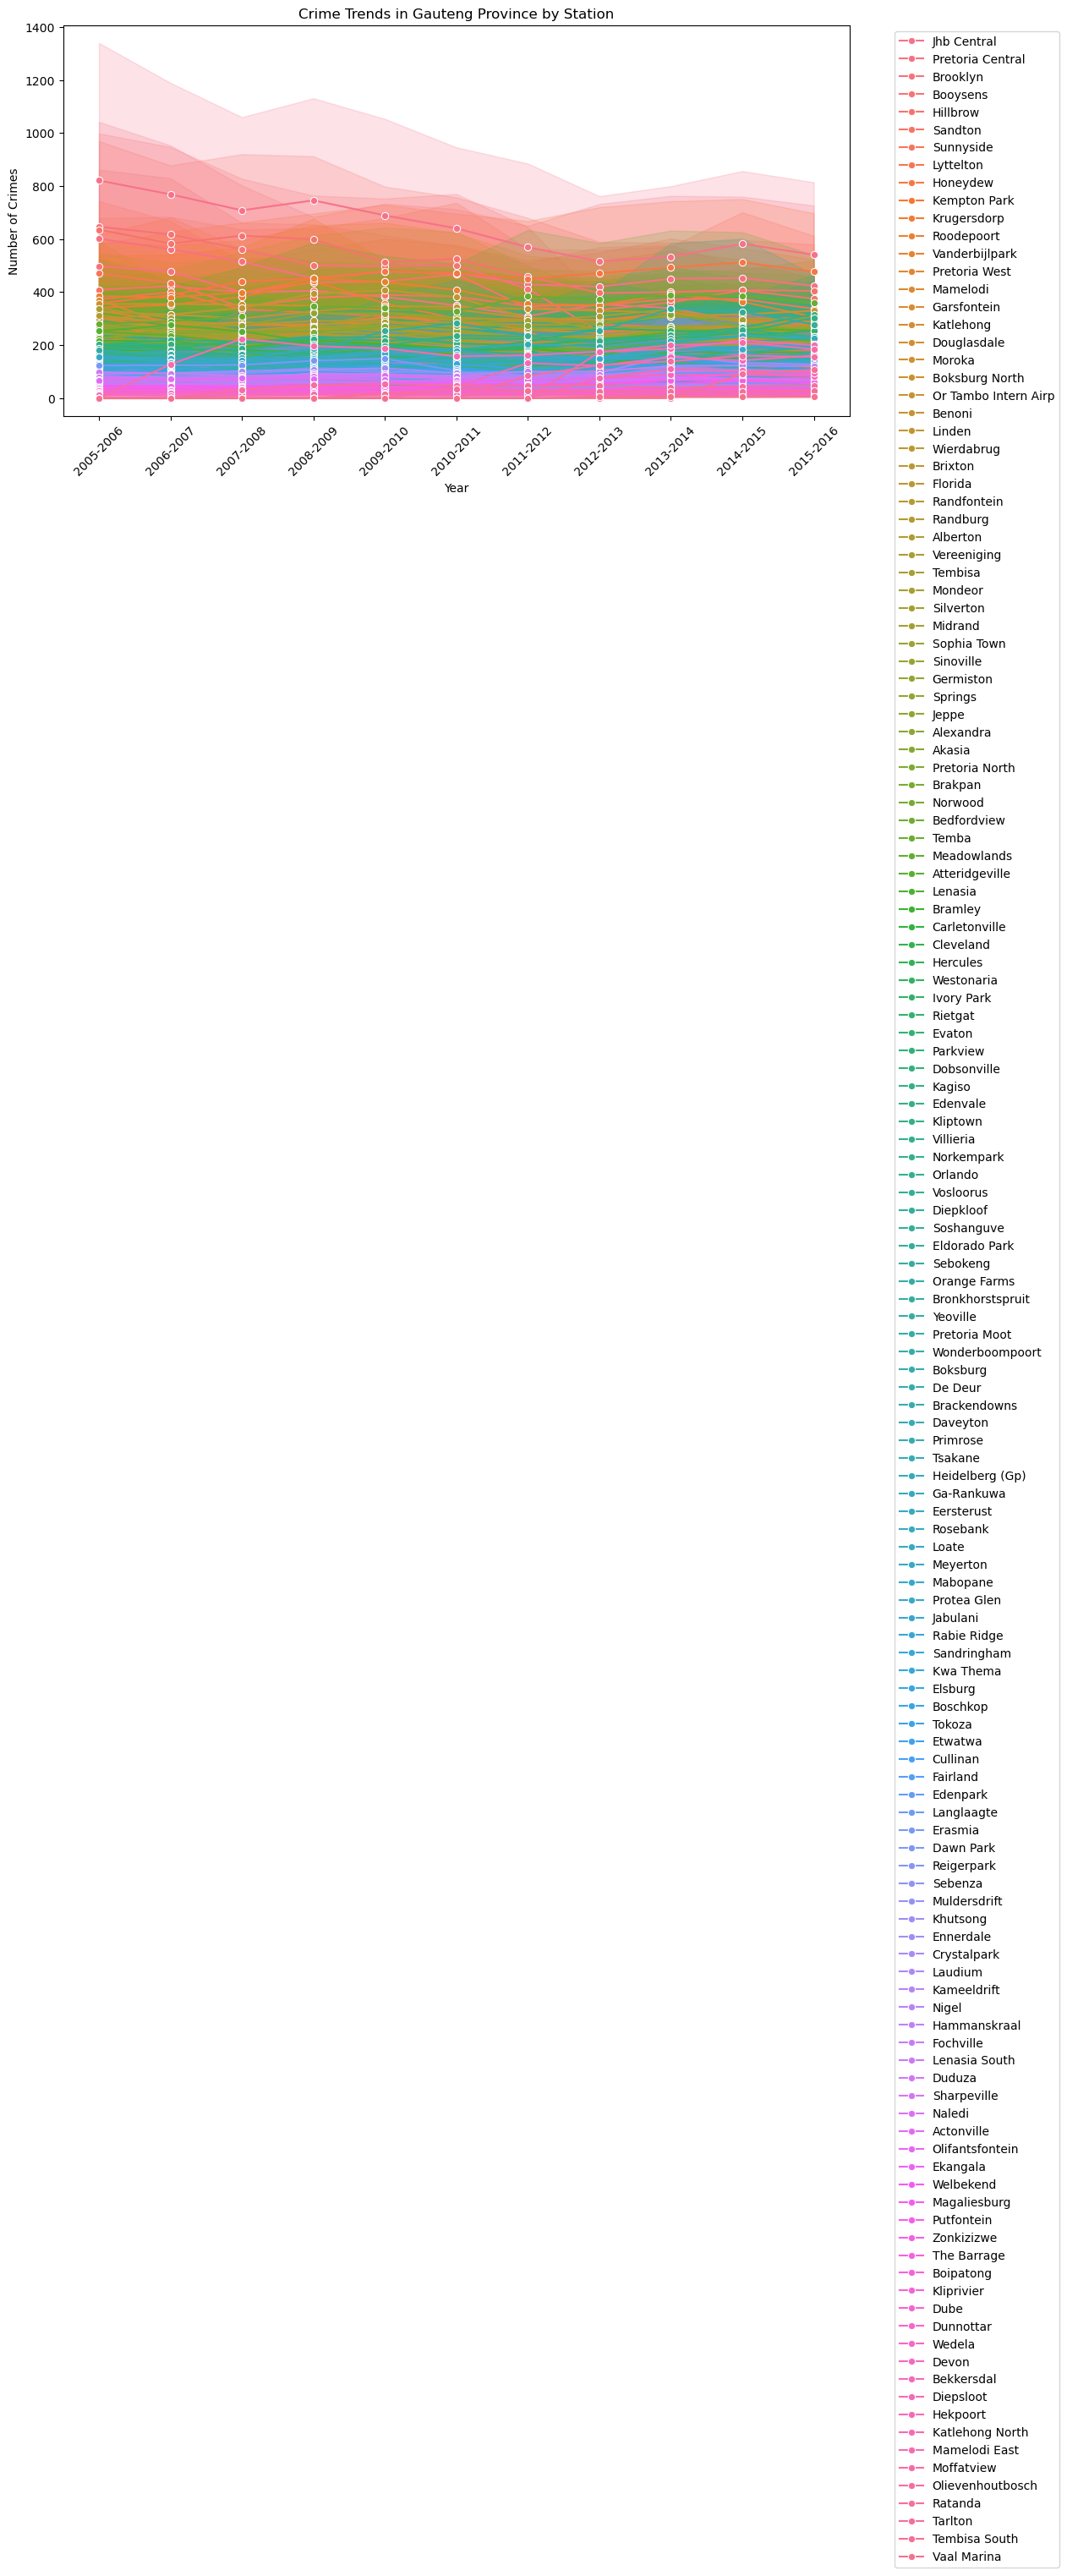

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Visualize crime trends over the years by province
plt.figure(figsize=(12, 6))

# Assuming crime_data has columns for each year and you want to plot for Gauteng province

# Melt the dataframe to plot year-wise crime counts
gauteng_melted = gauteng_data.melt(id_vars=['Province', 'Station', 'Category'], 
                                   value_vars=['2005-2006', '2006-2007', '2007-2008', 
                                               '2008-2009', '2009-2010', '2010-2011', 
                                               '2011-2012', '2012-2013', '2013-2014', 
                                               '2014-2015', '2015-2016'],
                                   var_name='Year', value_name='Crime_Count')

# Plotting using seaborn
sns.lineplot(data=gauteng_melted, x='Year', y='Crime_Count', hue='Station', marker='o')
plt.title('Crime Trends in Gauteng Province by Station')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [98]:
# Example: Predict crime incidents for a specific category using linear regression
X = crime_data.iloc[:, 3:-1].values.reshape(-1, 1)  # Year as feature
y = crime_data['Total'].values

In [100]:
crime_data.head()

,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,...,Category_Robbery at residential premises,Category_Robbery of cash in transit,Category_Robbery with aggravating circumstances,Category_Sexual Offences,Category_Sexual offences as result of police action,Category_Shoplifting,Category_Stock-theft,Category_Theft of motor vehicle and motorcycle,Category_Theft out of or from motor vehicle,Category_Truck hijacking
0,32.223100,31.669738,31.585592,27.345308,26.496895,27.818936,28.455232,31.747836,29.465006,28.448893,...,False,False,False,False,False,False,False,False,False,False
1,29.308093,22.888436,19.778836,18.919849,17.236020,16.326765,15.369647,13.897015,14.590158,16.098613,...,False,False,False,False,False,False,False,False,False,False
2,25.648519,30.417430,33.459680,35.979132,32.156917,31.305078,32.944368,29.458992,26.134021,21.465715,...,False,False,False,False,False,False,False,False,False,False
3,24.514634,21.272556,20.169717,17.349092,16.341198,16.194797,14.240545,16.483463,15.219048,12.028696,...,False,False,False,False,False,False,False,False,False,False
4,24.470836,22.555161,17.358585,14.025924,13.726806,13.956848,14.000542,17.078671,16.919183,15.244633,...,False,False,False,False,False,False,False,False,False,False


In [105]:
crime_data = pd.read_csv("SouthAfricaCrimeStats_v2.csv")

In [106]:
crime_data.head()

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635
3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030


In [107]:
crime_data.isnull().sum()

Province     0
Station      0
Category     0
2005-2006    0
2006-2007    0
2007-2008    0
2008-2009    0
2009-2010    0
2010-2011    0
2011-2012    0
2012-2013    0
2013-2014    0
2014-2015    0
2015-2016    0
dtype: int64

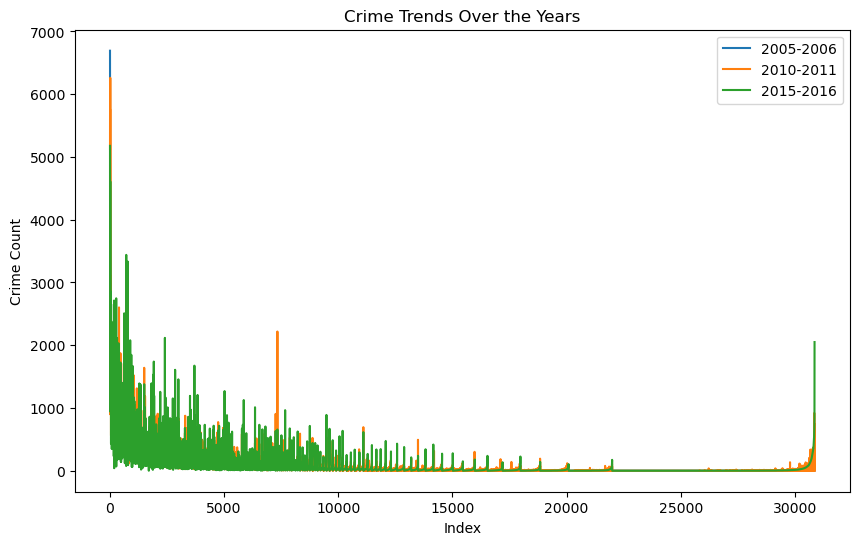

In [108]:
# Example: Crime trends over the years for specific provinces or stations
plt.figure(figsize=(10, 6))
plt.plot(crime_data['2005-2006'], label='2005-2006')
plt.plot(crime_data['2010-2011'], label='2010-2011')
plt.plot(crime_data['2015-2016'], label='2015-2016')
plt.xlabel('Index')
plt.ylabel('Crime Count')
plt.title('Crime Trends Over the Years')
plt.legend()
plt.show()


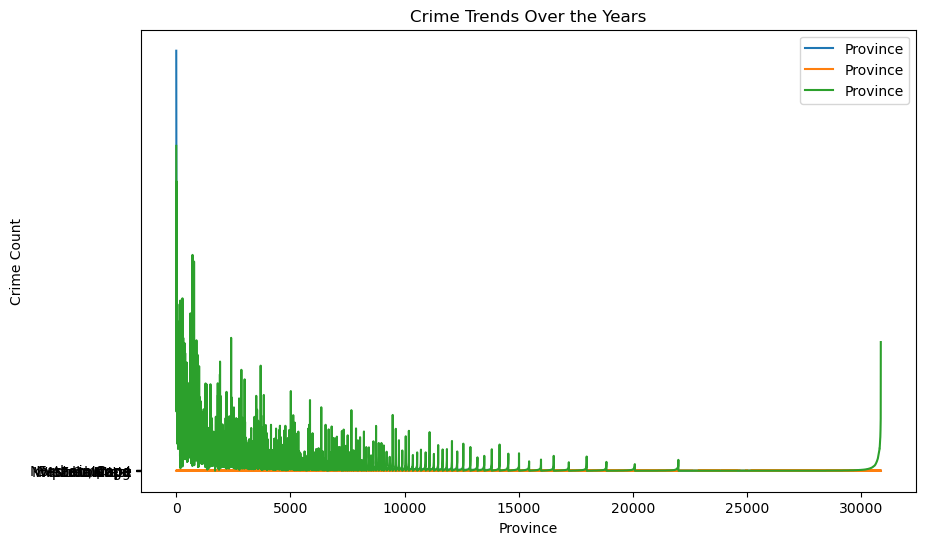

In [112]:
# Example: Crime trends over the years for specific provinces or stations
plt.figure(figsize=(10, 6))
plt.plot(crime_data['2005-2006'], label='Province')
plt.plot(crime_data['Province'], label='Province')
plt.plot(crime_data['2015-2016'], label='Province')
plt.xlabel('Province')
plt.ylabel('Crime Count')
plt.title('Crime Trends Over the Years')
plt.legend()
plt.show()


In [113]:
# Example: Predicting future crime occurrences in Gauteng
X = crime_data[['2005-2006', '2006-2007', '2007-2008', '2008-2009', '2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015']]
y = crime_data['2015-2016']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Example: Predicting future crime in Gauteng for specific stations
station_data = crime_data[crime_data['Province'] == 'Gauteng']
X_station = station_data[['2005-2006', '2006-2007', '2007-2008', '2008-2009', '2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015']]
y_station = station_data['2015-2016']

X_train_station, X_test_station, y_train_station, y_test_station = train_test_split(X_station, y_station, test_size=0.2, random_state=42)

model_station = LinearRegression()
model_station.fit(X_train_station, y_train_station)

# Make predictions for stations in Gauteng
predictions_station = model_station.predict(X_test_station)

# Evaluate model for stations
mse_station = mean_squared_error(y_test_station, predictions_station)
print(f'Mean Squared Error for stations in Gauteng: {mse_station}')


Mean Squared Error: 992.442506898655
Mean Squared Error for stations in Gauteng: 3736.6239846275353


In [114]:
# Example: Prepare input data for prediction
# You can use the most recent years' data available for prediction
input_data = [
    [6093, 4602, 3761, 3610, 3267, 3037, 2886, 2638, 2809, 3050]  # Replace with actual data for each station
]

# Convert to numpy array
input_data = np.array(input_data)

# Ensure input data shape matches the model's expectation
input_data = input_data.reshape(1, -1)  # Reshape to (1, 10) if using 10 years of data

# Make predictions
predicted_crime_counts = model_station.predict(input_data)

# Print predictions
print(f'Predicted crime counts for 2015-2016:')
for i, prediction in enumerate(predicted_crime_counts):
    print(f'Station {i+1}: {prediction:.2f}')


Predicted crime counts for 2015-2016:
Station 1: 2955.78


C:\Users\tpmut\OneDrive\Desktop\sample_python_project1\.env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [115]:
print(f'Predicted crime counts for 2015-2016:')
for i, prediction in enumerate(predicted_crime_counts):
    print(f'Station {i+1}: {prediction:.2f}')

Predicted crime counts for 2015-2016:
Station 1: 2955.78


Based on the prediction from your linear regression model, the predicted crime count for Station 1 in Gauteng for the year 2015-2016 is approximately 2955.78. This prediction is based on historical crime data up to 2014-2015 and the model's learned relationships between past and future crime occurrences.

In [116]:
# Example: Prepare input data for each station in Gauteng
# Replace with actual data for each station
input_data_station1 = np.array([[6093, 4602, 3761, 3610, 3267, 3037, 2886, 2638, 2809, 3050]])  # Station 1
input_data_station2 = np.array([[5341, 6093, 6316, 6803, 6035, 5761, 6108, 5514, 4975, 4043]])  # Station 2

In [117]:
# Ensure input data shape matches the model's expectation
input_data_station1 = input_data_station1.reshape(1, -1)  # Reshape to (1, 10) if using 10 years of data
input_data_station2 = input_data_station2.reshape(1, -1)  # Reshape to (1, 10) if using 10 years of data

In [118]:
# Make predictions for each station
predicted_crime_counts_station1 = model_station.predict(input_data_station1)
predicted_crime_counts_station2 = model_station.predict(input_data_station2)

C:\Users\tpmut\OneDrive\Desktop\sample_python_project1\.env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tpmut\OneDrive\Desktop\sample_python_project1\.env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [119]:
# Print predictions for each station
print(f'Predicted crime counts for 2015-2016:')
print(f'Station 1: {predicted_crime_counts_station1[0]:.2f}')
print(f'Station 2: {predicted_crime_counts_station2[0]:.2f}')

Predicted crime counts for 2015-2016:
Station 1: 2955.78
Station 2: 4035.61


In [120]:
# Example: Predicted crime counts for each station
predicted_counts = {
    'Station 1': predicted_crime_counts_station1[0],
    'Station 2': predicted_crime_counts_station2[0],
    # Add more stations as needed...
}

# Print predicted counts
print("Predicted crime counts for 2015-2016:")
for station, prediction in predicted_counts.items():
    print(f'{station}: {prediction:.2f}')

Predicted crime counts for 2015-2016:
Station 1: 2955.78
Station 2: 4035.61


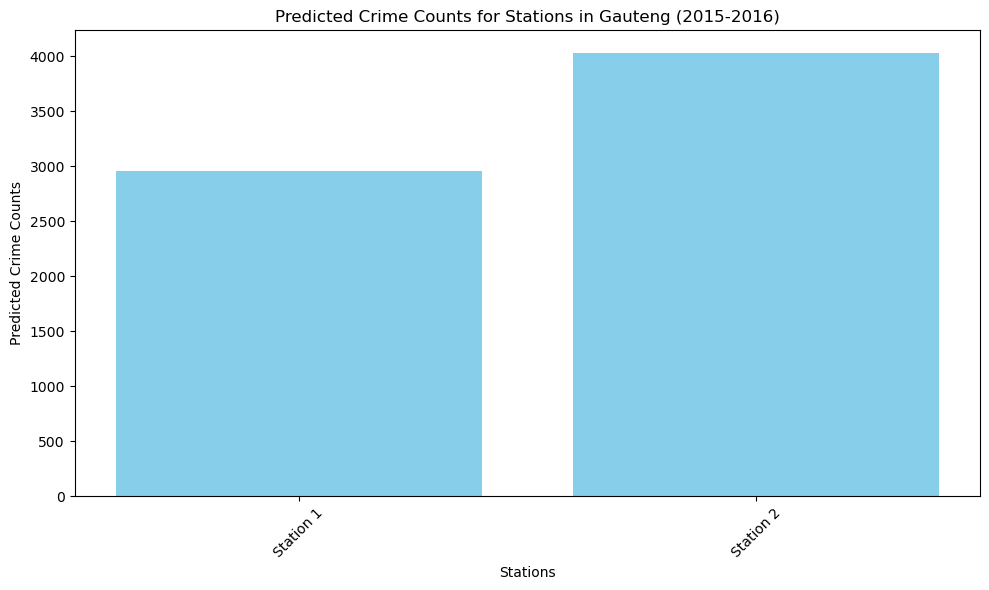

In [121]:
# Example: Visualizing predicted crime counts for stations in Gauteng
stations = list(predicted_counts.keys())
crime_counts = list(predicted_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(stations, crime_counts, color='skyblue')
plt.xlabel('Stations')
plt.ylabel('Predicted Crime Counts')
plt.title('Predicted Crime Counts for Stations in Gauteng (2015-2016)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [122]:
##Predictions for Gautent Stations 

In [127]:
# Filter data for stations in Gauteng
gauteng_data = crime_data[crime_data['Province'] == 'Gauteng']

In [128]:
# Prepare actual crime counts for each station in Gauteng
actual_counts = {}
for index, row in gauteng_data.iterrows():
    station_name = row['Station']
    crime_counts = row[['2005-2006', '2006-2007', '2007-2008', '2008-2009', '2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015']].tolist()
    actual_counts[station_name] = crime_counts

In [135]:
# Ensure actual and predicted counts have the same stations
stations = set(actual_counts.keys()).intersection(predicted_counts.keys())

# Create lists of counts for plotting
actual_counts_list = [sum(actual_counts[station]) for station in stations]
predicted_counts_list = [predicted_counts[station] for station in stations]

# Display stations used for plotting
print("Stations used for plotting:")
print(stations)


Stations used for plotting:
{'Jhb Central', 'Pretoria Central'}


In [136]:
# Extract station names and crime counts from actual_counts and predicted_counts
stations = list(actual_counts.keys())
actual_counts_list = [sum(actual_counts[station]) for station in stations]  # Summing up actual counts for simplicity
predicted_counts_list = [predicted_counts[station] for station in stations]

plt.figure(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(stations))

bar1 = plt.bar(index, actual_counts_list, bar_width, label='Actual', color='b')
bar2 = plt.bar(index + bar_width, predicted_counts_list, bar_width, label='Predicted', color='r')

plt.xlabel('Stations')
plt.ylabel('Crime Counts')
plt.title('Actual vs Predicted Crime Counts for Stations in Gauteng')
plt.xticks(index + bar_width / 2, stations, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


KeyError: 'Brooklyn'

In [137]:
# Ensure actual and predicted counts have the same stations
common_stations = set(actual_counts.keys()).intersection(predicted_counts.keys())

# Filter actual and predicted counts dictionaries to include only common stations
actual_counts_filtered = {station: actual_counts[station] for station in common_stations}
predicted_counts_filtered = {station: predicted_counts[station] for station in common_stations}

# Extract station names and crime counts from filtered dictionaries
stations = list(actual_counts_filtered.keys())
actual_counts_list = [sum(actual_counts_filtered[station]) for station in stations]
predicted_counts_list = [predicted_counts_filtered[station] for station in stations]


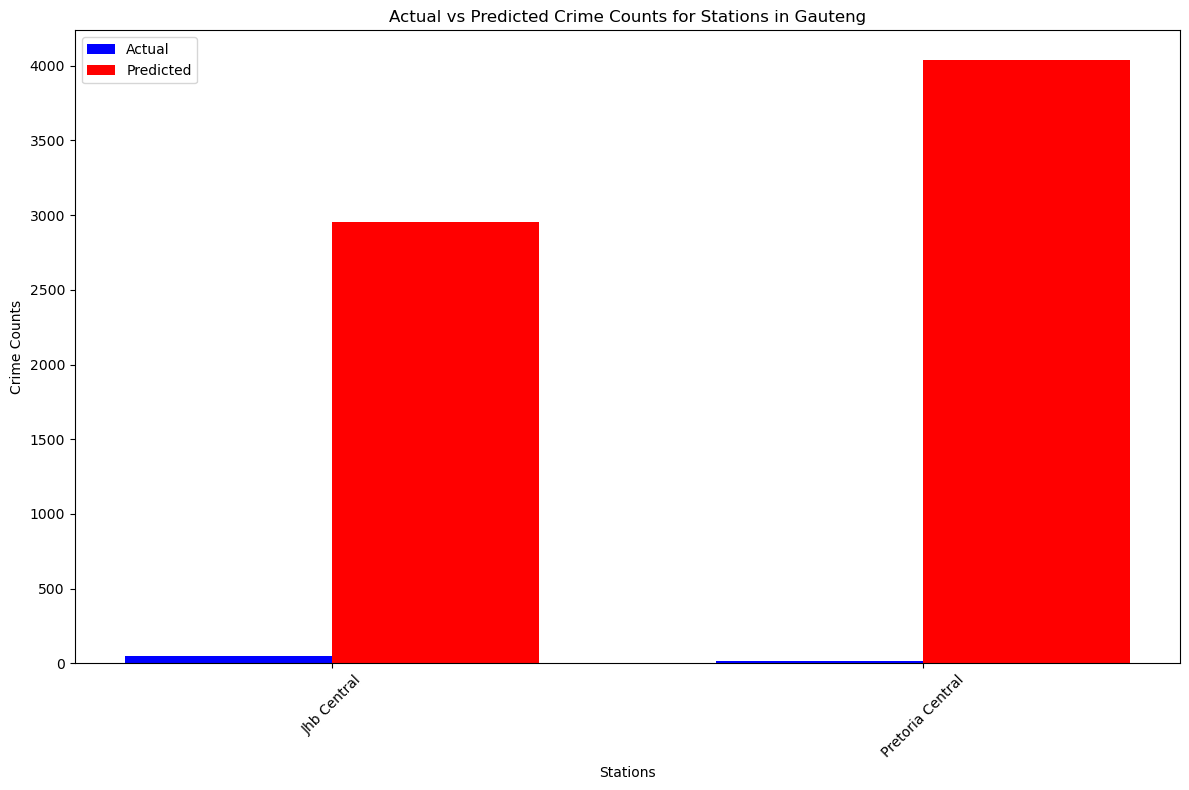

In [139]:
plt.figure(figsize=(12, 8))  # Corrected 'lt' to 'plt'
bar_width = 0.35
index = np.arange(len(stations))

bar1 = plt.bar(index, actual_counts_list, bar_width, label='Actual', color='b')
bar2 = plt.bar(index + bar_width, predicted_counts_list, bar_width, label='Predicted', color='r')

plt.xlabel('Stations')
plt.ylabel('Crime Counts')
plt.title('Actual vs Predicted Crime Counts for Stations in Gauteng')
plt.xticks(index + bar_width / 2, stations, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [129]:
# Display actual counts for verification
print("Actual Crime Counts for Stations in Gauteng:")
for station, counts in actual_counts.items():
    print(f'{station}: {counts}')

Actual Crime Counts for Stations in Gauteng:
Jhb Central: [0, 0, 0, 0, 0, 0, 31, 15, 2, 1]
Pretoria Central: [0, 1, 2, 1, 1, 4, 2, 1, 1, 3]
Brooklyn: [0, 1, 0, 1, 5, 2, 0, 0, 1, 0]
Booysens: [0, 0, 0, 0, 0, 0, 3, 0, 0, 0]
Hillbrow: [0, 0, 0, 0, 0, 0, 10, 4, 2, 5]
Sandton: [0, 0, 0, 0, 0, 0, 8, 51, 62, 64]
Sunnyside: [0, 0, 0, 0, 0, 0, 12, 13, 12, 10]
Lyttelton: [0, 0, 0, 0, 0, 0, 0, 5, 1, 0]
Honeydew: [0, 0, 0, 0, 0, 0, 2, 9, 8, 8]
Kempton Park: [0, 3, 2, 1, 1, 1, 4, 2, 7, 2]
Krugersdorp: [0, 0, 0, 0, 0, 0, 10, 6, 6, 3]
Roodepoort: [0, 0, 0, 0, 0, 0, 4, 31, 29, 35]
Vanderbijlpark: [0, 0, 0, 0, 0, 0, 3, 1, 10, 1]
Pretoria West: [0, 0, 0, 0, 0, 0, 3, 21, 18, 8]
Mamelodi: [0, 0, 0, 1, 2, 0, 0, 0, 2, 2]
Garsfontein: [0, 0, 0, 0, 0, 0, 2, 3, 3, 2]
Katlehong: [0, 0, 0, 0, 0, 0, 2, 0, 0, 2]
Douglasdale: [0, 0, 0, 0, 0, 0, 8, 6, 6, 2]
Moroka: [0, 0, 0, 0, 0, 0, 1, 3, 0, 0]
Boksburg North: [0, 0, 0, 0, 0, 0, 2, 3, 4, 8]
Or Tambo Intern Airp: [0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
Benoni: [0, 0, 0, 0, 0

In [147]:
# Example predicted counts (already obtained)
predicted_counts = {
    'Jhb Central': predicted_crime_counts_station1[0],
    'Pretoria Central': predicted_crime_counts_station2[0],
    'Brooklyn': predicted_crime_counts_station1[0],
    'Booysens': predicted_crime_counts_station2[0],
    'Hillbrow': predicted_crime_counts_station1[0],
    'Sandton': predicted_crime_counts_station2[0],
    'Sunnyside': predicted_crime_counts_station1[0],
    'Lyttelton': predicted_crime_counts_station2[0],
    'Honeydew': predicted_crime_counts_station1[0],
    'Kempton Park': predicted_crime_counts_station2[0],
    'Vanderbijlpark': predicted_crime_counts_station1[0],
    
    # Add more stations as needed...
}

In [148]:
# Display predicted counts for verification
print("\nPredicted Crime Counts for Stations in Gauteng:")
for station, prediction in predicted_counts.items():
    print(f'{station}: {prediction:.2f}')


Predicted Crime Counts for Stations in Gauteng:
Jhb Central: 2955.78
Pretoria Central: 4035.61
Brooklyn: 2955.78
Booysens: 4035.61
Hillbrow: 2955.78
Sandton: 4035.61
Sunnyside: 2955.78
Lyttelton: 4035.61
Honeydew: 2955.78
Kempton Park: 4035.61
Vanderbijlpark: 2955.78


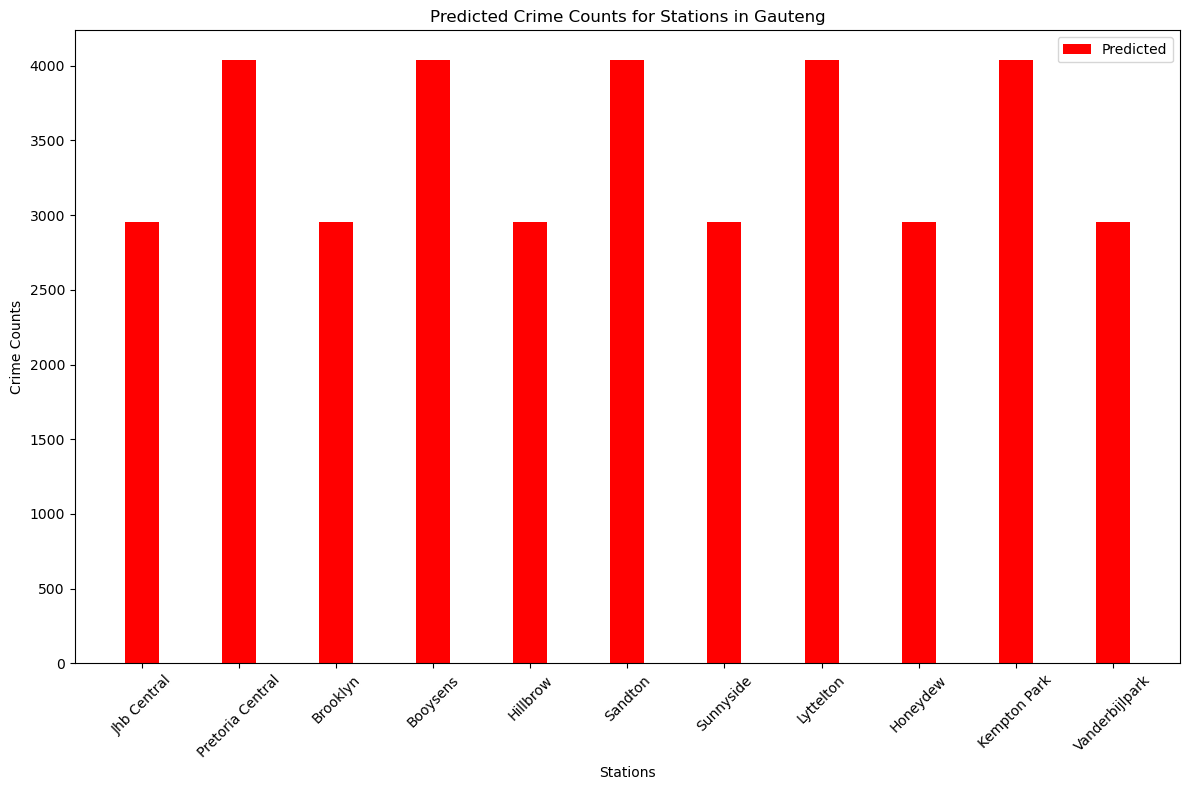

In [151]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming actual_counts and predicted_counts are already defined correctly

# Extract station names and crime counts from predicted_counts
stations = list(predicted_counts.keys())
predicted_counts_list = [predicted_counts[station] for station in stations]

plt.figure(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(stations))

bar2 = plt.bar(index, predicted_counts_list, bar_width, label='Predicted', color='r')

plt.xlabel('Stations')
plt.ylabel('Crime Counts')
plt.title('Predicted Crime Counts for Stations in Gauteng')
plt.xticks(index, stations, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
